In [1]:
from src.utils import construct_sparse_adj_mat
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# enzymes labeled with EC number

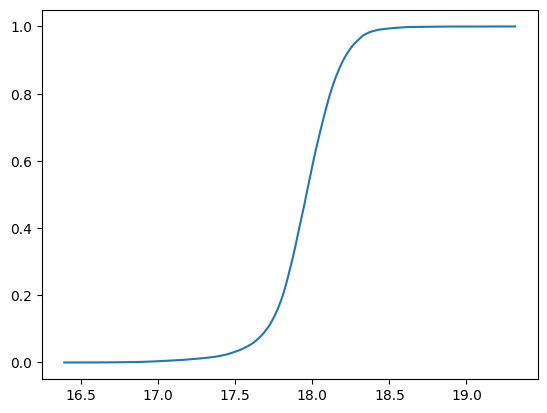

In [2]:
# Missing information in the norms?

X = np.load("/scratch/spn1560/swissprot_esm_X_unnormed.npy")

norms = np.linalg.norm(X, axis=1)
norms = sorted(norms)
ycdf = np.arange(1, len(norms)+1) / len(norms)

plt.plot(norms, ycdf)
plt.show()

del X

In [3]:
train_data_name = 'swissprot'
embed_type = 'esm'


X = np.load("/scratch/spn1560/swissprot_esm_X.npy")
y, idx_sample, idx_feature = construct_sparse_adj_mat(train_data_name)
sample_idx = {v:k for k,v in idx_sample.items()}


Constructing swissprot sparse adjacency matrix


In [4]:
# Compute feature x feature correlation matrix

X_corr = X - X.mean(axis=0).reshape(1,-1)
X_corr /= X.std(axis=0).reshape(1,-1)
corr = (X_corr.T @ X_corr) / X_corr.shape[0]

thresh = 0.8
np.argwhere(corr - np.eye(corr.shape[0]) > thresh)

del X_corr

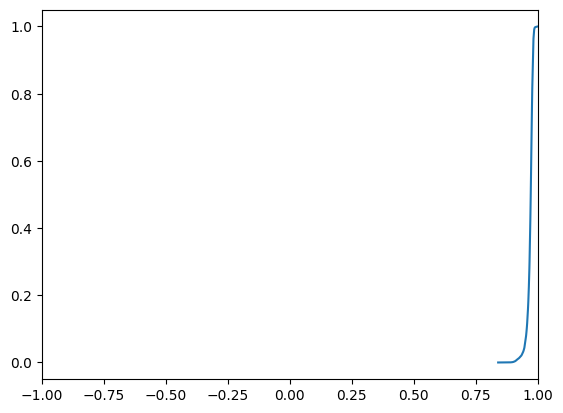

In [5]:
rng = np.random.default_rng(seed=1234)
n_samples = 1000
cos_sim = []
idxs = rng.choice(np.arange(X.shape[0]), size=(n_samples,), replace=False)
for n, i in enumerate(idxs):
    for j in idxs[n+1:]:
        vec1, vec2 = X[i, :].reshape(-1,), X[j, :].reshape(-1,)
        cos_sim.append(np.dot(vec1, vec2))

cos_sim = sorted(cos_sim)
ycdf = np.arange(1, len(cos_sim)+1) / len(cos_sim)
plt.plot(cos_sim, ycdf)
plt.xlim(-1, 1)
plt.show()


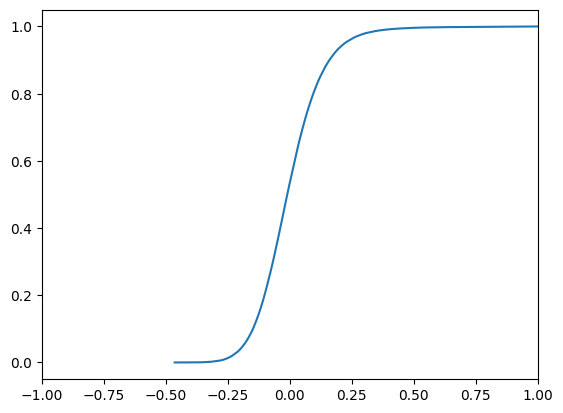

In [6]:
mu = X.mean(axis=0).reshape(1,-1)
X_demeaned = X - mu
X_demeaned /= np.linalg.norm(X_demeaned, axis=1).reshape(-1,1)

rng = np.random.default_rng(seed=1234)
n_samples = 1000
cos_sim = []
idxs = rng.choice(np.arange(X_demeaned.shape[0]), size=(n_samples,), replace=False)
for n, i in enumerate(idxs):
    for j in idxs[n+1:]:
        vec1, vec2 = X_demeaned[i, :].reshape(-1,), X_demeaned[j, :].reshape(-1,)
        cos_sim.append(np.dot(vec1, vec2))

cos_sim = sorted(cos_sim)
ycdf = np.arange(1, len(cos_sim)+1) / len(cos_sim)
plt.plot(cos_sim, ycdf)
plt.xlim(-1, 1)
plt.show()


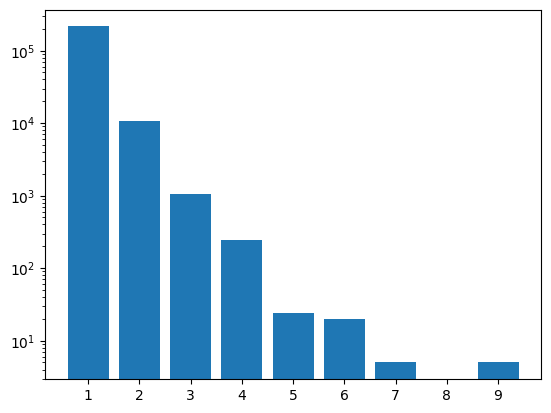

In [7]:
# Count enzyme labels with multiple filters

labels_per_prot = np.array(y.sum(axis=1)).reshape(-1,)
ct = Counter(labels_per_prot)
x, h = list(ct.keys()), list(ct.values())
plt.bar(x, h)
plt.yscale('log')
plt.xticks(np.arange(1, max(x) + 1))
plt.show()

# Enzymes labeled with imt ops

In [8]:
del X, y

train_data_name = 'sp_ops'
embed_type = 'esm'


X = np.load(f"/scratch/spn1560/{train_data_name}_esm_X.npy")
y, idx_sample, idx_feature = construct_sparse_adj_mat(train_data_name)
sample_idx = {v:k for k,v in idx_sample.items()}

Constructing sp_ops sparse adjacency matrix


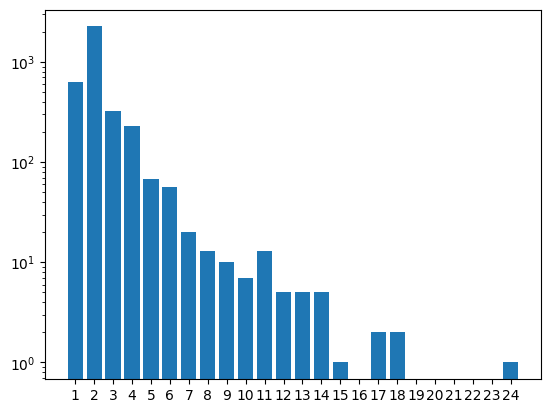

In [9]:
labels_per_prot = np.array(y.sum(axis=1)).reshape(-1,)
ct = Counter(labels_per_prot)
x, h = list(ct.keys()), list(ct.values())
plt.bar(x, h)
plt.yscale('log')
plt.xticks(np.arange(1, max(x) + 1))
plt.show()

In [15]:
y[2,:].nonzero()[1]

array([ 9, 10, 11, 12], dtype=int32)

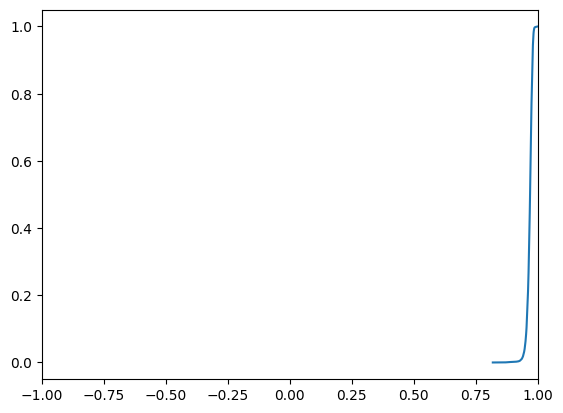

In [16]:
rng = np.random.default_rng(seed=1234)
n_samples = 1000
cos_sim = []
idxs = rng.choice(np.arange(X.shape[0]), size=(n_samples,), replace=False)
for n, i in enumerate(idxs):
    for j in idxs[n+1:]:
        vec1, vec2 = X[i, :].reshape(-1,), X[j, :].reshape(-1,)
        cos_sim.append(np.dot(vec1, vec2))

cos_sim = sorted(cos_sim)
ycdf = np.arange(1, len(cos_sim)+1) / len(cos_sim)
plt.plot(cos_sim, ycdf)
plt.xlim(-1, 1)
plt.show()

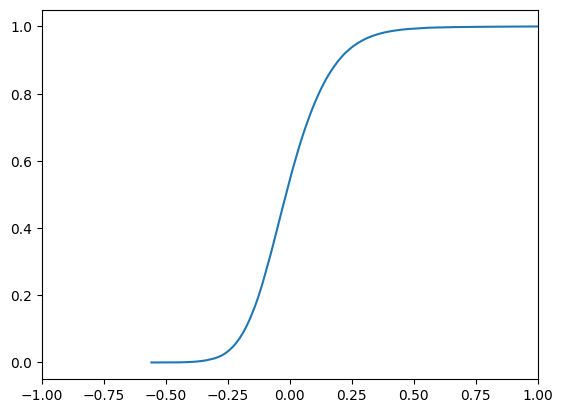

In [17]:
mu = X.mean(axis=0).reshape(1,-1)
X_demeaned = X - mu
X_demeaned /= np.linalg.norm(X_demeaned, axis=1).reshape(-1,1)

rng = np.random.default_rng(seed=1234)
n_samples = 1000
cos_sim = []
idxs = rng.choice(np.arange(X_demeaned.shape[0]), size=(n_samples,), replace=False)
for n, i in enumerate(idxs):
    for j in idxs[n+1:]:
        vec1, vec2 = X_demeaned[i, :].reshape(-1,), X_demeaned[j, :].reshape(-1,)
        cos_sim.append(np.dot(vec1, vec2))

cos_sim = sorted(cos_sim)
ycdf = np.arange(1, len(cos_sim)+1) / len(cos_sim)
plt.plot(cos_sim, ycdf)
plt.xlim(-1, 1)
plt.show()
